## Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Preparing the data

## Import data as a pandas dataframe and shuffling it

In [2]:
data = pd.read_csv("data.csv")
data = data.sample(frac=1)

## Preparing data
1. Data is split into inputs(X) and targets(y) and converted into numpy arrays.
2. Inputs are normalised
3. Data is split into training set and testing set.

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting data into inputs and targets
y = data[['Y1','Y2']]
X =  data[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = np.array(y)
X = np.array(X)

# Normalising inputs
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

PCA was not used on this dataset for the following reasons:
1. There is no intention to plot the data, thus removing the need to reduce the dimensions to something we can understand.
2. Dataset is small and easy to compute, thus again not requiring PCA to reduce computational complexity.
3. When PCA was used the models performed very poorly, the MSE was more than double the current values for all models. 

## Regression function
Function that takes a model, training and testing data, trains the model and uses it to predict training and testing values and returns both the values in an array.

In [4]:
from sklearn.metrics import mean_squared_error

def regressor(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    testoutputs = model.predict(x_test)
    trainoutputs = model.predict(x_train)
    return [mean_squared_error(testoutputs,y_test),mean_squared_error(trainoutputs,y_train)]

# Regression models

This section shows the initialisation of the 3 models and demonstrates each model being able to provide a prediction for a given input (the testing data in this case)

## 1. Neural Network Regressor

In [5]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(max_iter=5000)
result = regressor(MLP,X_train,y_train,X_test,y_test)
print("Neural Network MSE with testing data: ",result[0])
print("Neural Network MSE with training value: ",result[1])

Neural Network MSE with testing data:  7.457343566425147
Neural Network MSE with training value:  6.8867337188525255


## 2. Random Forest Regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
result = regressor(RFR,X_train,y_train,X_test,y_test)
print("Random Forest MSE with testing data: ",result[0])
print("Random Forest MSE with training value: ",result[1])

Random Forest MSE with testing data:  1.9865977680194824
Random Forest MSE with training value:  0.2663848018403912


## 3. Support Vector Machine Regressor

In [7]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

SVR = MultiOutputRegressor(SVR())

result = regressor(SVR,X_train,y_train,X_test,y_test)
print("Support Vector Machine MSE with testing data: ",result[0])
print("Support Vector Machine MSE with training value: ",result[1])

Support Vector Machine MSE with testing data:  8.068495003936441
Support Vector Machine MSE with training value:  8.484624405305146


## KFold Cross Validation

In [8]:
from sklearn.model_selection import KFold

# Creating a Kfold object which will shuffle the data and then split the data into 5 equal parts.
kf5 = KFold(n_splits=5 , random_state = 4, shuffle=True)

# Initialising empty arrays to store MSE values from each fold
RFRvalues = MLPvalues = SVMvalues = np.empty((0,2))

# For loop iterating over the 5 different folds and appending the resulting MSE from each fold for each model to the arrays above.
for train_index, test_index in kf5.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index], y[test_index]

    MLPvalues = np.append(MLPvalues, [regressor(MLP,X_train,y_train,X_test,y_test)], axis = 0)
    RFRvalues = np.append(RFRvalues, [regressor(RFR,X_train,y_train,X_test,y_test)], axis = 0)
    SVMvalues = np.append(SVMvalues, [regressor(SVR,X_train,y_train,X_test,y_test)], axis = 0)

# Visualisation
Data is visualised using a Boxplot showing the MSE values of each model when each of them are tested by predicting the testing data and the training data.

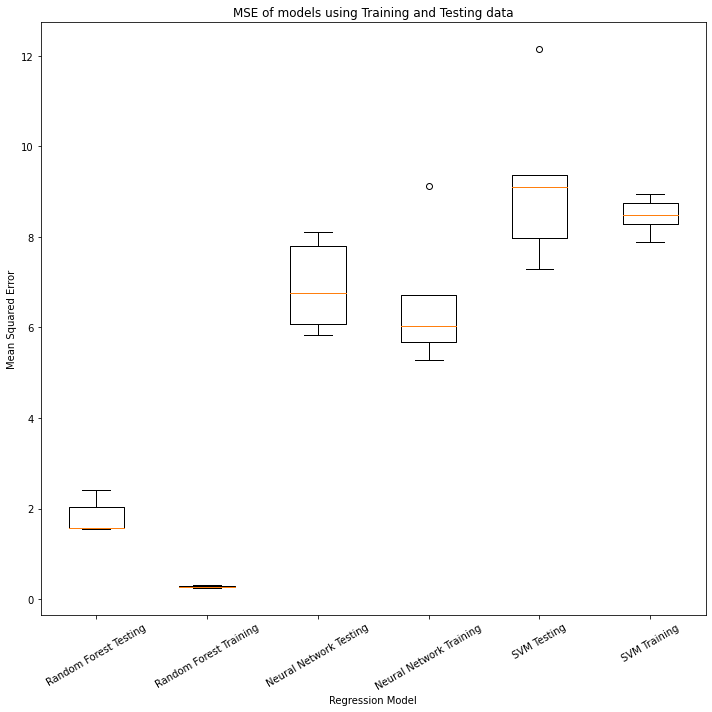

In [10]:
# Dictionary which stores the arrays and their respective names, making it easier for the developer to test and edit.
data = {'Random Forest Testing': RFRvalues[:,0],'Random Forest Training': RFRvalues[:,1], 'Neural Network Testing': MLPvalues[:,0], 'Neural Network Training': MLPvalues[:,1], 'SVM Testing':SVMvalues[:,0], 'SVM Training':SVMvalues[:,1]}

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.title("MSE of models using Training and Testing data")

ax.boxplot(data.values())
ax.set_xticklabels(data.keys(),rotation=30)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Regression Model')

plt.show()